# REGRESIÓN

Tras el preprocesamiento de los datos, se implementaron cuatro modelos de regresión para predecir el precio de las casas: ElasticNet, Decision Tree, Random Forest y XGBoost.

Cada modelo se ajustó utilizando GridSearchCV para optimizar sus hiperparámetros, mismos que fueron evaluados con R2 (coeficiente de determinación) y RMSE (raíz del error cuadrático medio).

# Carga de las bibliotecas y los datos

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import joblib
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv("../Data/processed_train.csv",  index_col="Id")
pd.options.display.max_columns = None
data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.078896,-0.133270,0.651479,-0.517200,1.050994,0.878668,1.203619,0.779431,-0.355342,-0.340511,0.002513,1.180528,-0.120242,0.529194,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.951226,0.311725,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.087688,-1.599111,0.138777,0.560067,0.516203,0.701291,0.337112,0.617969,0.225716,0.787005,0.398383,0.101885,0.443276,-0.302390,0.526185,1.277270,1.305559,1.052302,-0.238112,0.409923,0.149696,0.891179,0.263813,0.307254,0.735994,0.237044,0.783137,0.289745,0.390017,0.467450,0.015996
2,0.572719,0.113413,-0.071836,2.179628,0.156734,-0.429577,-0.806841,0.888257,-0.355342,0.002218,0.341114,-0.870117,-0.120242,-0.381965,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.600495,0.311725,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.087688,-0.489110,-0.614439,0.212763,0.516203,0.701291,0.337112,-1.980262,0.225716,-1.226570,-2.481790,0.101885,0.443276,0.870185,0.526185,-0.405467,-0.386267,-0.689604,-0.238112,0.333383,0.149696,0.891179,0.263813,0.307254,-0.771091,0.237044,0.783137,0.289745,0.390017,0.467450,1.199671
3,0.062541,0.420049,0.651479,-0.517200,0.984752,0.830215,1.131524,0.654803,-0.355342,0.230372,0.065397,1.184762,-0.120242,0.659631,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.600495,0.311725,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.087688,0.990891,0.138777,0.734046,0.516203,-1.016637,0.337112,0.617969,0.225716,0.787005,0.398383,0.101885,0.443276,-0.302390,0.526185,1.277270,1.305559,1.052302,-0.238112,0.409923,0.149696,0.891179,0.263813,0.307254,0.735994,0.237044,0.783137,0.289745,0.390017,0.467450,0.015996
4,-0.329561,0.103317,0.651479,-0.517200,-1.863632,-0.720298,-0.806841,0.384539,-0.355342,0.348034,-0.105819,1.143550,-0.120242,0.541448,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.600495,1.650307,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.087688,-1.599111,-1.367655,-0.437383,0.516203,-1.016637,0.337112,-1.421836,0.225716,-0.770369,0.398383,0.101885,0.443276,-0.302390,0.526185,-0.485325,-1.413031,-0.689604,-0.238112,-2.539830,0.149696,-0.151386,0.263813,0.307254,0.735994,0.237044,-0.803476,0.289745,0.390017,-2.143417,-1.177668
5,0.726089,0.878431,1.374795,-0.517200,0.951632,0.733308,1.423411,0.754400,-0.355342,0.295711,0.256237,1.244087,-0.120242,1.282295,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,0.600495,1.650307,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,-0.087688,2.100892,0.138777,1.014651,0.516203,-1.016637,0.337112,-1.980262,0.225716,-0.927680,0.398383,0.101885,0.443276,-0.302390,0.526185,1.277270,1.305559,1.052302,-0.238112,0.409923,0.149696,0.891179,0.263813,0.307254,0.735994,0.237044,0.783137,0.289745,0.390017,0.467450,0.015996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.226913,-0.259231,-0.071836,-0.517200,0.918511,0.733308,-0.806841,-1.414140,-0.355342,0.654093,0.096134,1.117594,-0.120242,0.416598,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.600495,0.311725,-0.946701,0.653002,-0.404244,-0.128521,-0.292769,-0.069393,-0.087688,0.620891

In [36]:
datatest = pd.read_csv("../Data/processed_test.csv",  index_col="Id")
datatest

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,PavedDrive,SaleType,SaleCondition,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,0.623823,0.561787,-0.751101,0.400766,-0.340945,-1.072885,-0.780195,0.648657,2.234418,-0.002197,0.056019,-0.857154,-0.080483,-1.442112,-0.818068,-0.258160,-1.028720,-0.751040,-1.029543,-0.20391,-0.898055,-0.988189,0.968486,-1.093550,-0.450468,-0.094573,2.844271,-0.063967,-0.092244,-0.038281,1.713905,-2.189614,0.703009,0.335962,0.587456,0.207992,2.089075,-2.430245,0.101921,0.458889,0.875974,0.496430,1.281050,1.289812,-0.678102,-0.223518,0.203090,0.094817,-1.211189,0.272716,0.301994,-0.772410,0.238311,0.797218,0.339114,0.399491,0.460043,1.214317
1462,0.661410,0.970407,-0.054877,0.400766,-0.439695,-1.214908,1.015602,0.876989,-0.369720,0.214289,0.395932,-0.857154,-0.080483,-0.194908,-0.818068,-0.258160,-1.028720,1.237648,0.175997,-0.20391,-0.898055,-0.988189,1.365515,0.581419,-0.450468,-0.094573,-0.324992,-0.063967,19.730438,-0.038281,1.713905,0.553568,-1.090156,0.335962,-1.519586,0.207992,2.089075,0.407717,0.101921,0.458889,0.875974,-1.945246,-0.497872,-0.523171,-0.678102,-0.223518,0.203090,0.094817,-1.211189,0.272716,0.301994,0.741264,0.238311,0.797218,0.339114,0.399491,0.460043,1.214317
1463,0.388069,0.908413,-0.751101,-0.497418,0.844059,0.678742,-0.780195,0.825084,-0.369720,-0.361433,0.098161,1.153084,-0.080483,0.449155,-0.818068,-0.258160,0.773083,1.237648,0.175997,-0.20391,0.647066,0.301406,1.127876,0.555642,-0.450468,-0.094573,-0.324992,-0.063967,-0.092244,-1.140614,1.713905,0.553568,-1.090156,0.335962,0.587456,0.207992,-0.224860,0.407717,0.101921,0.458889,-0.403714,0.496430,1.281050,1.289812,-0.678102,-0.223518,0.555224,0.094817,-0.165553,0.272716,0.301994,-0.772410,0.238311,0.797218,0.339114,0.399491,0.460043,-0.072596
1464,0.547237,0.257857,-0.054877,0.400766,0.876976,0.678742,0.385215,0.733280,-0.369720,0.094526,0.096373,1.142867,-0.080483,0.400213,-0.818068,-0.258160,0.773083,1.237648,0.175997,-0.20391,0.647066,0.301406,1.331718,0.581419,-0.450468,-0.094573,-0.324992,-0.063967,-0.092244,-0.038281,1.713905,0.553568,-1.090156,0.335962,0.587456,0.207992,-0.224860,0.407717,0.101921,0.458889,-0.403714,0.496430,1.281050,1.289812,-0.678102,-0.223518,0.555224,0.094817,0.880083,0.272716,0.301994,0.741264,0.238311,0.797218,0.339114,0.399491,0.460043,-0.072596
1465,-1.245577,-1.116969,1.337571,-0.497418,0.679475,0.394694,-0.780195,0.455161,-0.369720,0.702299,0.364781,-0.857154,-0.080483,-0.313771,-0.818068,-0.258160,0.773083,-0.751040,-1.029543,-0.20391,-0.898055,0.301406,-0.943556,0.956184,-0.450468,-0.094573,2.963846,-0.063967,-0.092244,-1.875504,1.713905,0.553568,-1.090156,-2.940873,0.587456,0.207992,-1.276648,0.407717,0.101921,-2.094937,0.875974,0.496430,-0.410384,-0.494484,1.027675,-0.223518,0.555224,0.094817,0.880083,0.272716,0.301994,0.741264,0.238311,0.797218,0.339114,0.399491,0.460043,-0.944997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-3.368886,-3.009264,-1.447325,1.298950,-0.044694,-0.646813,-0.780195,-1.422364,-0.369720,0.371658,-0.341376,1.076562,-0.080483,-0.816336,-0.818068,-0.258160,-1.028720,1.237648,0.175997,-0.20391,-0.898055,-2.277784,-0.943556,-1.093550,-0.450468,-0.094573,-0.324992,-0.063967,-0.092244,-0.038281,-1.359958,-1.651090,0.70

# División de los datos

Los datos se dividieron en variables predictoras (X) y la variable objetivo (SalePrice).

In [37]:
x = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

# Regresión con ElasticNet

El conjunto de datos está compuesto por 58 variables, de las cuales algunas probablemente no contribuyen significativamente a la predicción. Por ello se eligió un modelo lineal que combina las regularizaciones L1 (Lasso) y L2 (Ridge) para seleccionar características relevantes y controlar el sobreajuste.

Hiperparámetros evaluados:  

`alpha`: controla la penalización general.  
`l1_ratio`: regula el balance entre L1 y L2.

In [38]:
regularizacion = ElasticNet(max_iter=2000)

params = {"alpha": [0.1, 0.5, 1, 2, 5, 10], 
          "l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_en = GridSearchCV(regularizacion, params, cv=10, 
                       return_train_score= True, 
                       scoring=["r2", "neg_root_mean_squared_error"], 
                       refit="neg_root_mean_squared_error")
grid_en.fit(X=x, y=y)

results_en =  pd.DataFrame(grid_en.cv_results_)
metricas_en = results_en[["params", 'mean_test_r2', 'mean_test_neg_root_mean_squared_error']]
df_metricas_en = metricas_en.sort_values(by="mean_test_neg_root_mean_squared_error", ascending=False).head(5)
df_metricas_en


,params,mean_test_r2,mean_test_neg_root_mean_squared_error
0,"{'alpha': 0.1, 'l1_ratio': 0.1}",0.882790,-0.337182
1,"{'alpha': 0.1, 'l1_ratio': 0.2}",0.879333,-0.342494
2,"{'alpha': 0.1, 'l1_ratio': 0.3}",0.875657,-0.348012
3,"{'alpha': 0.1, 'l1_ratio': 0.4}",0.870395,-0.355682
4,"{'alpha': 0.1, 'l1_ratio': 0.5}",0.864055,-0.364626


# Regresión con árboles de decisión

Hiperparámetros evaluados:
  
`max_depth`: profundidad máxima del árbol.  
`min_samples_split`: tamaño mínimo de un nodo para dividirse.  
`min_samples_leaf`: tamaño mínimo de cada hoja.

In [39]:
params = {'max_depth' : [8, 10, 15, 20, 25, 30, 35, 40, 45], 
          'min_samples_split': [2, 5, 10, 15, 18, 20], 
          'min_samples_leaf': [8, 10, 12, 14, 16]}

arbol = DecisionTreeRegressor()

grid_dt = GridSearchCV(estimator=arbol, param_grid=params, 
                       return_train_score=True, 
                       cv=5, scoring=["r2", "neg_root_mean_squared_error"], 
                       refit="neg_root_mean_squared_error", n_jobs = -1)

grid_dt.fit(x, y)

results_dt =  pd.DataFrame(grid_dt.cv_results_)
pd.set_option('display.max_colwidth', None)
metricas_dt = results_dt[["params", 'mean_test_r2', "mean_test_neg_root_mean_squared_error"]]
df_metricas_dt = metricas_dt.sort_values(by="mean_test_neg_root_mean_squared_error", ascending=False).head(5)
df_metricas_dt


,params,mean_test_r2,mean_test_neg_root_mean_squared_error
45,"{'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 15}",0.794760,-0.451102
43,"{'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 5}",0.794760,-0.451102
195,"{'max_depth': 35, 'min_samples_leaf': 12, 'min_samples_split': 15}",0.794688,-0.451179
222,"{'max_depth': 40, 'min_samples_leaf': 12, 'min_samples_split': 2}",0.794688,-0.451179
255,"{'max_depth': 45, 'min_samples_leaf': 12, 'min_samples_split': 15}",0.794688,-0.451179


# Regresión con bosques aleatorios

Hiperparámetros evaluados:

`n_estimators`: número de árboles en el bosque.  
`max_depth`, `min_samples_split`, `min_samples_leaf`: similar al árbol de decisión.  
`max_features`: número máximo de características consideradas en cada división.

In [40]:
random = RandomForestRegressor(n_jobs= -1, bootstrap=True)
params = {'n_estimators': [100, 300, 500, 800],
          'min_samples_split': [2, 5, 10], 
          'min_samples_leaf': [1, 2, 5],
          'max_features': ['sqrt'],
          'max_depth': [5, 10, 15]}

grid_rf = GridSearchCV(estimator=random, n_jobs= -1, param_grid=params, 
                       return_train_score=True, cv=5, 
                       scoring=["r2", "neg_root_mean_squared_error"], 
                       refit="neg_root_mean_squared_error")

grid_rf.fit(x,y)
results_rf = pd.DataFrame(grid_rf.cv_results_)

metricas_rf = results_rf[["params", 'mean_test_r2', 'mean_test_neg_root_mean_squared_error']]
df_metricas_rf = metricas_rf.sort_values(by='mean_test_neg_root_mean_squared_error', ascending=False).head(5)

df_metricas_rf



,params,mean_test_r2,mean_test_neg_root_mean_squared_error
75,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}",0.879405,-0.346721
73,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}",0.879254,-0.346966
74,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}",0.879160,-0.347061
72,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",0.879004,-0.347273
77,"{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}",0.877747,-0.349022


# Regresión con XGBoost

Hiperparámetros evaluados:

`n_estimators`: número de árboles.  
`max_depth`: profundidad máxima.  
`learning_rate`: tasa de aprendizaje.  
`gamma`: regularización.  
`colsample_bytree`: proporción de características usadas por cada árbol.

In [41]:
params_xgb = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5],
    'learning_rate': [ 0.1, 0.2],
    'subsample': [0.8],
    'gamma': [0, 0.1, 0.2, 0.5],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0]}

xgb = XGBRegressor()
grid_xgb = GridSearchCV(xgb, param_grid=params_xgb, 
                        return_train_score=True, cv=5,
                        scoring=["r2", "neg_root_mean_squared_error"], 
                        refit="neg_root_mean_squared_error", n_jobs=-1)
grid_xgb.fit(x, y)
results_xgb = pd.DataFrame(grid_xgb.cv_results_)

metricas_xgb = results_xgb[["params", 'mean_test_r2', 'mean_test_neg_root_mean_squared_error']]
df_metricas_xgb = metricas_xgb.sort_values(by='mean_test_neg_root_mean_squared_error', ascending=False).head(5)
df_metricas_xgb


,params,mean_test_r2,mean_test_neg_root_mean_squared_error
1,"{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}",0.903633,-0.310010
0,"{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}",0.903278,-0.310561
40,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}",0.902300,-0.312124
41,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}",0.902204,-0.312270
9,"{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}",0.902198,-0.312272


# Comparación de algoritmos

Para evaluar gráficamente el desempeño de los modelos, se generaron gráficos de dispersión que comparan los valores reales de la variable objetivo (SalePrice) con las predicciones.

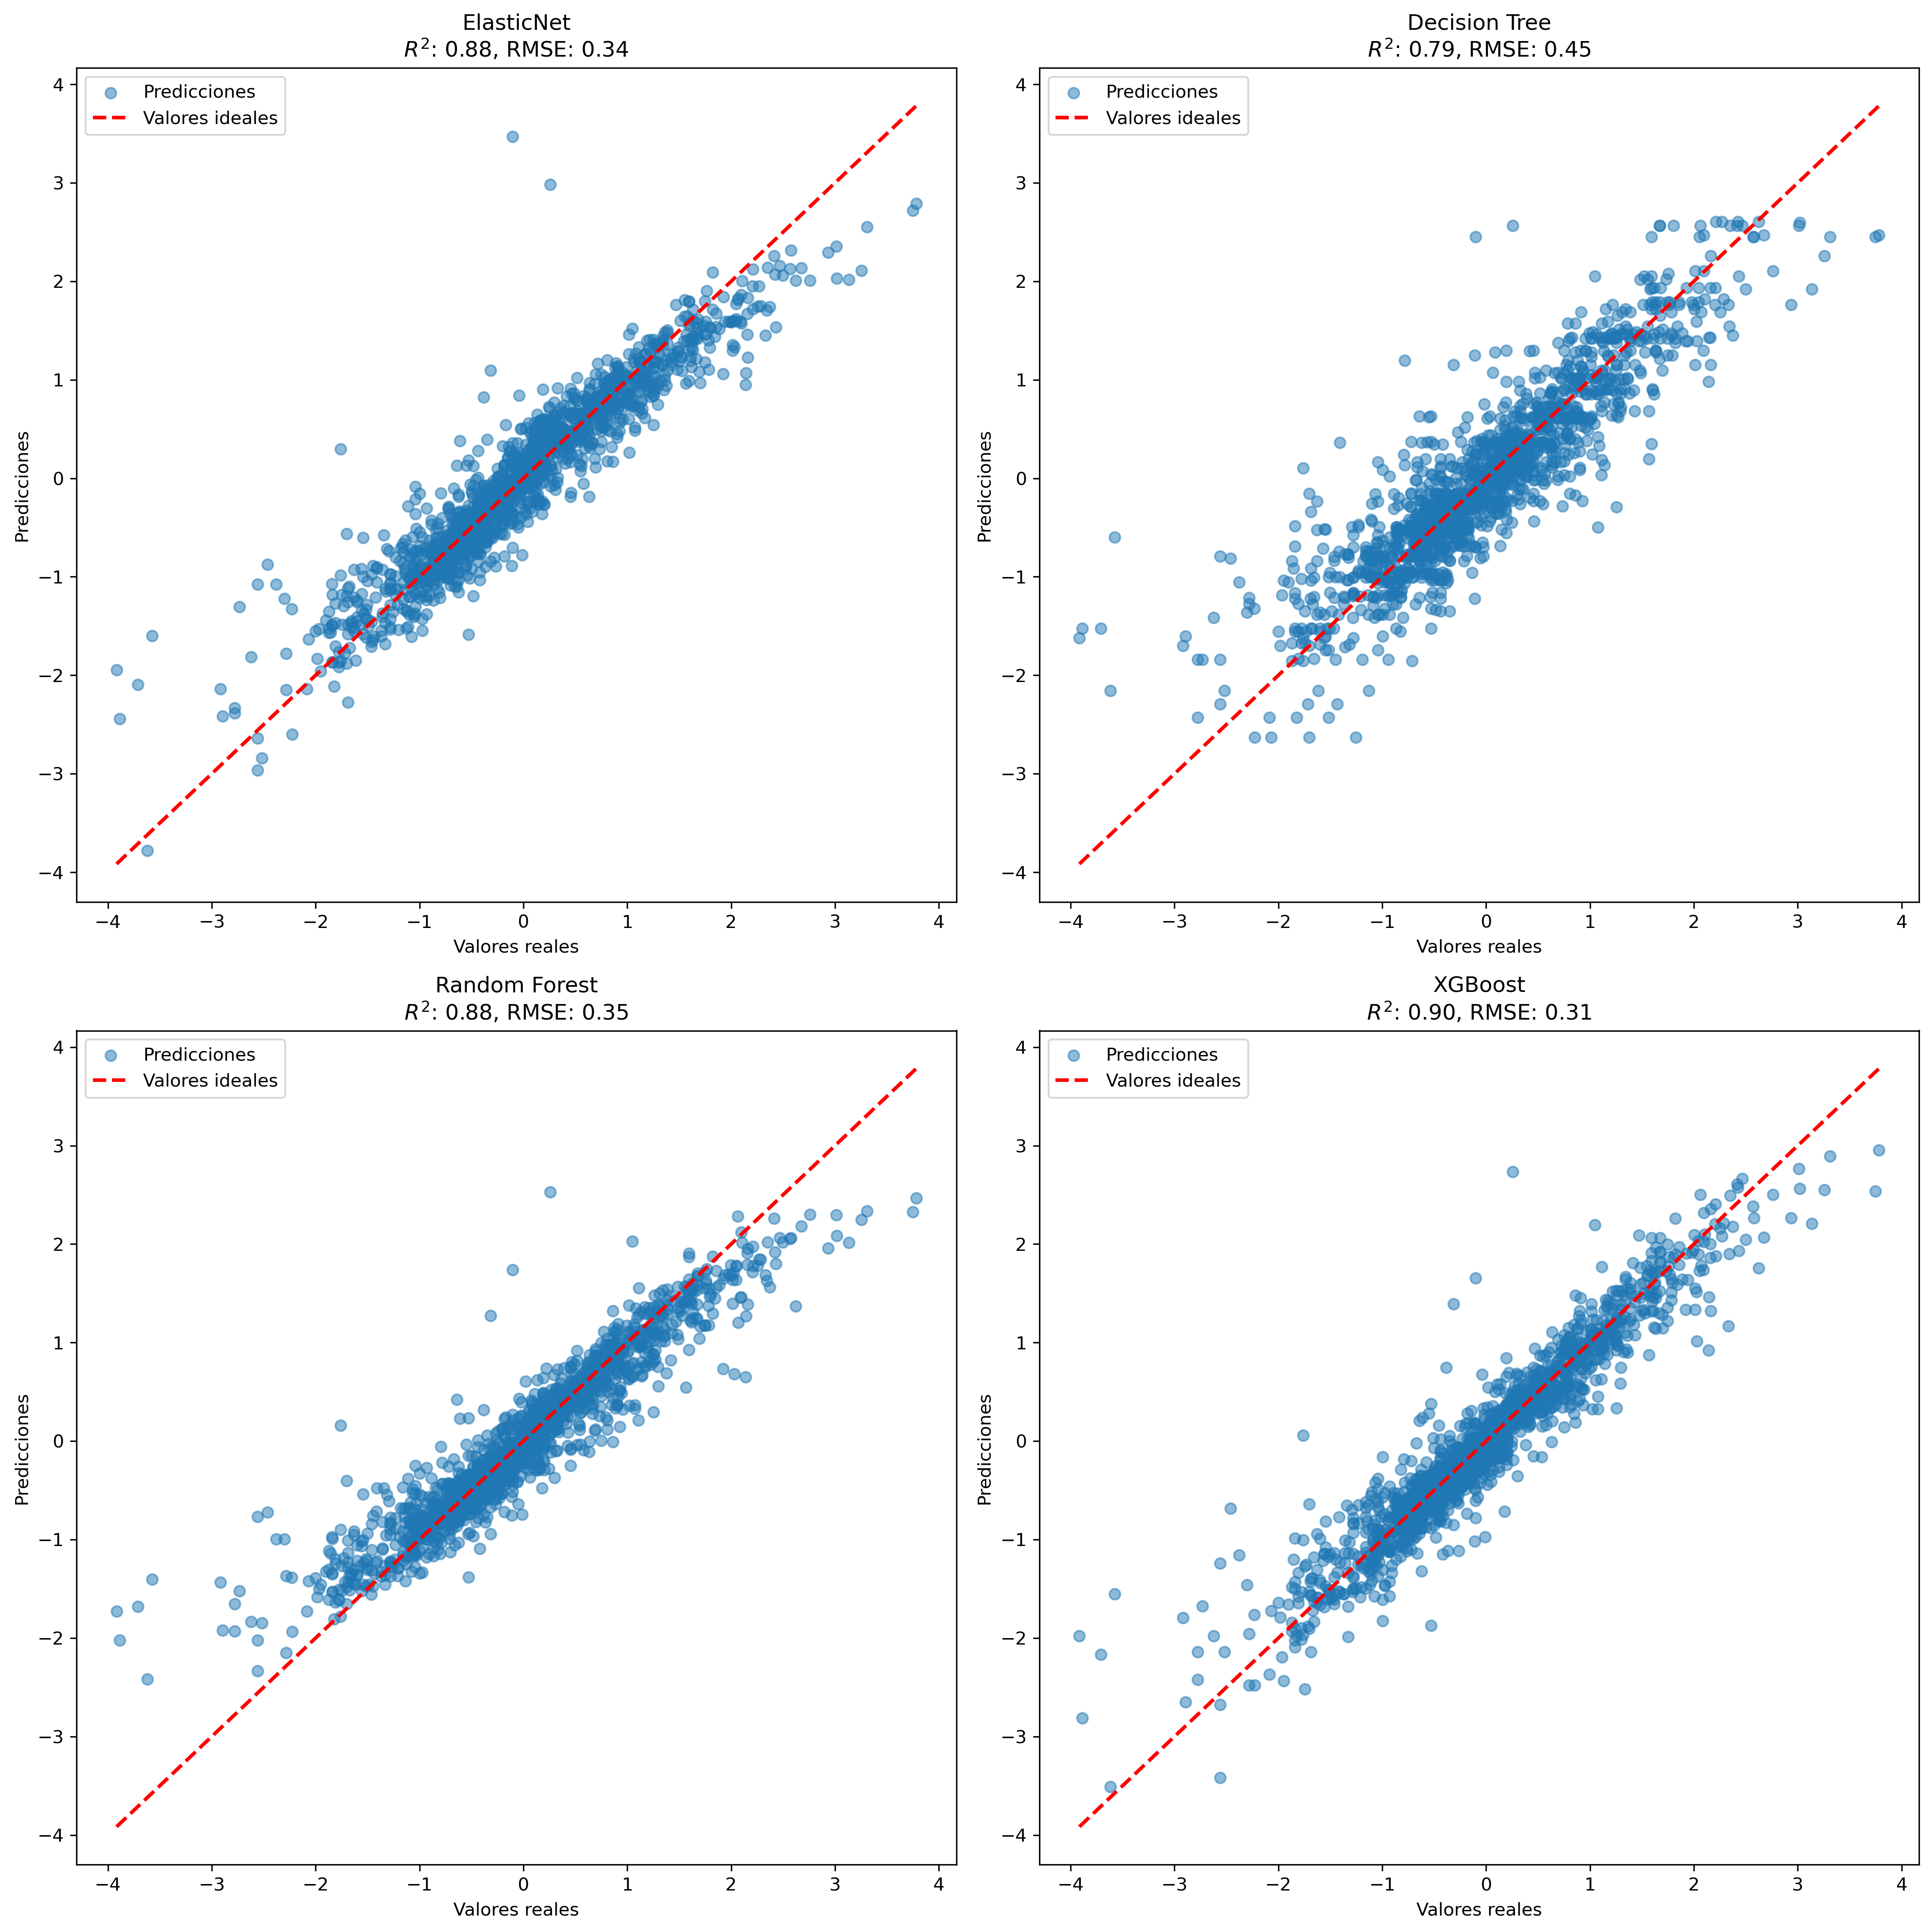

In [42]:
models = {
    'ElasticNet': grid_en,
    'Decision Tree': grid_dt,
    'Random Forest': grid_rf,
    'XGBoost': grid_xgb}

def plot_real_vs_pred(models):
    plt.figure(figsize=(15, 15), dpi =300) 
    i = 0  
    for name, model in models.items():
        i += 1
        plt.subplot(2, 2, i) 
        predictions_cv = cross_val_predict(model.best_estimator_, x, y, cv=5)
        plt.scatter(y, predictions_cv, alpha=0.5, label='Predicciones')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Valores ideales')
        plt.xlabel('Valores reales')
        plt.ylabel('Predicciones')
        plt.title(f"{name}\n$R^2$: {model.cv_results_['mean_test_r2'][model.best_index_]:.2f}, RMSE: {model.cv_results_['mean_test_neg_root_mean_squared_error'][model.best_index_]*-1:.2f}")
        plt.legend()
    plt.tight_layout()
    plt.show()
plot_real_vs_pred(models)


ElasticNet: El mejor modelo logró un R² de 0.88 y un RMSE de 0.34. Esto indica que ElasticNet capturó el 88% de la variabilidad del precio de las casas.

Árboles de decisión: El mejor modelo alcanzó un R² de 0.79 y un RMSE de 0.45. Aunque tiene un rendimiento inferior al de ElasticNet, es útil para identificar relaciones específicas entre las características.

Random forest: El mejor modelo alcanzó un R² de 0.87 y un RMSE de 0.35, con un rendimiento competitivo frente a ElasticNet.

XGBoost: El modelo con n_estimators=500 y max_depth=3 obtuvo un R² de 0.90 y un RMSE de 0.31, siendo el más preciso de todos los modelos evaluados.

# Importancia de las variables para XGBoost

Para el modelo XGBoost, se analizó la importancia de las características para identificar cuáles tuvieron mayor impacto en las predicciones. El gráfico muestra las diez características más relevantes.

In [43]:
importancia = grid_xgb.best_estimator_.feature_importances_
features = x.columns 
df_importancia = pd.DataFrame({'Característica': features, 'Importancia': importancia})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False).head(10)

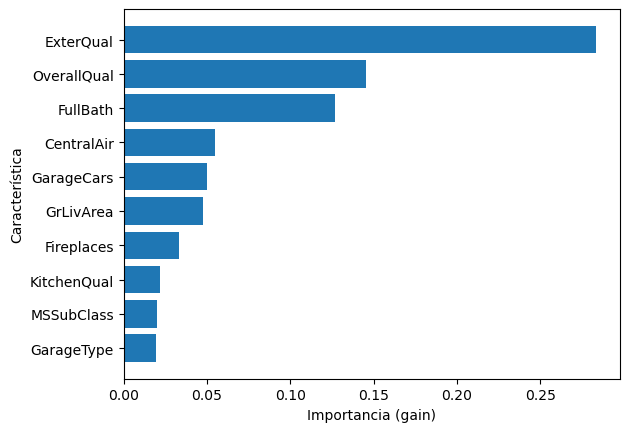

In [44]:
def plot_feature_importances():
    plt.barh(df_importancia["Característica"],df_importancia["Importancia"],align="center")
    plt.xlabel("Importancia (gain)")
    plt.ylabel("Característica")
    plt.gca().invert_yaxis()
    plt.show
plot_feature_importances()

El análisis de importancia de características es útil para entender el comportamiento del modelo. En este caso el análisis destaca que las características relacionadas con la calidad, el espacio habitable y las funcionalidades adicionales fueron las más relevantes.

Las tres característcas más importantes fueron:

ExterQual: Variable ordinal basada en una escala subjetiva de calidad del materiar del exterior de la propiedad.

FullBath: Número de baños completos.

OveralQuall: También es una variable ordinal con una escala de calidad del material y acabados de la casa.

# Predicción del conjunto de datos de prueba

El modelo entrenado con XGBoost fue utilizado para predecir los precios en el conjunto de prueba. Posteriormente, se aplicaron los siguientes pasos:

**1- Desescalamiento:** Se utilizó la transformación inversa de StandardScaler.  
**2- Reversión logarítmica:** Los valores fueron transformados nuevamente a su escala original utilizando la función exponencial.

In [45]:
predictions = grid_xgb.predict(datatest).astype('float64')

scaler = joblib.load('../Data/scaler_targetb.pkl')
predictions_descaled = scaler.inverse_transform(predictions.reshape(-1, 1))

predictions_original = np.expm1(predictions_descaled)

Finalmente, el DataFrame con las predicciones fue exportado a un archivo CSV.

In [46]:
pd.DataFrame(predictions_original, columns = ['SalePrice'], index = datatest.index).to_csv('../Data/predictions.csv')

# Conclusiones

De los cuatro modelos de regresión evaluados, XGBoost mostró el mejor desempeño con un R2 de 0.90 y un RMSE de 0.31. Esto indica que es el modelo más eficaz para capturar la relación entre las características y el precio de las casas en este conjunto de datos. Sin embargo, ElasticNet y Random Forest también ofrecieron resultados competitivos, lo que sugiere que pueden ser buenas alternativas dependiendo del contexto.

El análisis de importancia destacó que las características relacionadas con la calidad de la vivienda (OverallQual y ExterQual), el espacio habitable (GrLivArea) y las funcionalidades adicionales (GarageCars, FullBath) tienen un impacto significativo en el precio de las propiedades.

# Perspectivas

Se podrían explorar técnicas como la eliminación de características de baja importancia o métodos como PCA para reducir la dimensionalidad del conjunto de datos y evaluar su efecto en la eficiencia del modelo.

La creación de nuevas características, como interacciones entre variables, podría aumentar la capacidad predictiva de los modelos. Por ejemplo, la combinación de métricas relacionadas con el tamaño y la calidad.